In [1]:
import os
import json
import numpy as np
import torch
import result
import pandas as pd
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, rmse_np, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import *
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# pred 3 time step

## Best Jar

In [14]:
best_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_jar_3'))
jar_result = result.Printer(best_jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['final_sum_score', 'final_rmse_score', 'activation', 'data_normalize'], increase=False).sort_values('final_sum_score')
jar_df

,final_sum_score,final_rmse_score,activation,data_normalize
ori-stnn_05-11-00-03-30_3105,489.481,610.887,tanh,d
ori-stnn_05-11-00-08-18_1987,489.481,610.887,tanh,d
v3-stnn_05-11-00-03-30_9510,1244.87,566.689,tanh,d
v3-stnn_05-11-00-08-18_4608,1244.87,566.689,tanh,d
ori-stnn_05-11-00-03-30_8934,3950.13,212.221,tanh,x
ori-stnn_05-11-00-08-18_8874,3950.13,212.221,tanh,x
v3-stnn_05-11-00-03-30_4097,4074.89,218.507,tanh,x
v3-stnn_05-11-00-08-18_2977,4074.89,218.507,tanh,x
v1-stnn_05-11-00-03-30_3872,8489.4,467.777,sigmoid,x
v1-stnn_05-11-00-08-18_2934,8489.4,467.777,sigmoid,x


In [14]:
jar_min_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-03-30_3872', 'v3': 'v3-stnn_05-11-00-08-18_2977'}
jar_min_sum = {'v0': 'ori-stnn_05-11-00-03-30_3105', 'v1': 'v1-stnn_05-11-00-03-30_3872', 'v3': 'v3-stnn_05-11-00-03-30_9510'}

6079.087295337636
8621.598071354614
4603.767768517922


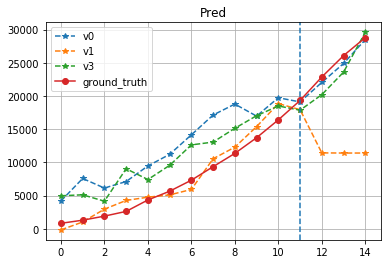

({'v0': array([ 4177.7122345 ,  7568.01066589,  6125.93318176,  7106.29104614,
          9455.35035706, 11200.92544556, 14143.15338135, 17128.70375061,
         18781.19644165, 16966.37921143, 19736.23905945, 19101.17085266,
         22044.84011841, 24894.22055054, 28493.38531494]),
  'v1': array([ -182.96113184,  1014.99956244,  2945.31211904,  4259.7138496 ,
          4749.92474745,  5093.04448627,  5913.25230534, 10538.50074255,
         12287.04606044, 15381.77956396, 18851.86845833, 17936.13666523,
         11424.44917464, 11401.21590602, 11402.11371452]),
  'v3': array([ 4963.10456085,  5109.07583618,  4144.24858093,  9036.26423645,
          7407.24838257,  9546.21324158, 12630.04563904, 13050.90792847,
         15130.45535278, 17025.10092163, 18495.42247009, 17859.18238831,
         20197.18039703, 23588.10517883, 29603.85856628])},
 array([  814.,  1282.,  1895.,  2608.,  4329.,  5646.,  7309.,  9346.,
        11346., 13711., 16399., 19320., 22859., 26079., 28793.]))

In [40]:
result.plot_pred_by_dir(jar_min_sum, best_jar_folder, train=True, increase=False, line_time=12)

## Best Feb

In [9]:
best_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_feb_3'))
feb_result = result.Printer(best_feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['true_sum_score', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize'], increase=False).sort_values('true_sum_score')
feb_df

KeyError: "['true_sum_score'] not in index"

In [26]:
feb_min_rmse = {'v0': 'ori-stnn_05-11-00-03-30_8934', 'v1': 'v1-stnn_05-11-00-03-30_7356', 'v3': 'v3-stnn_05-11-00-03-30_4097',  }
feb_min_sum = {'v0': 'ori-stnn_05-11-00-03-30_9789', 'v1': 'v1-stnn_05-11-00-08-18_8219', 'v3': 'v3-stnn_05-11-00-03-30_8886', 'LSTM': 'keras-rnn_05-11-19-01-22_0911', 'GRU': 'keras-rnn_05-11-19-01-22_4449'}

feb_rnn
108.20452957614434
681.3879360659245
38.369883509366524
3037.7908506355234
3710.229457000422


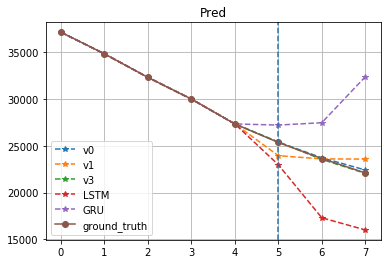

({'v0': array([37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 25403.42236328, 23723.61883545, 22421.21899414]),
  'v1': array([37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 23953.47991943, 23603.97363281, 23587.99853516]),
  'v3': array([37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 25417.23565674, 23552.34051514, 22064.11419678]),
  'LSTM': array([37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 22980.99023438, 17305.625     , 16009.83398438]),
  'GRU': array([37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 27223.14648438, 27478.71875   , 32391.54492188])},
 array([37155., 34847., 32327., 30007., 27349., 25364., 23644., 22109.]))

In [28]:
result.plot_pred_by_dir(feb_min_sum, best_feb_folder, train=False, increase=False, line_time=5)

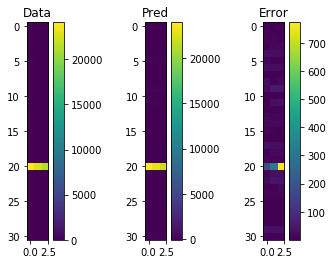

In [7]:
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_path = best_feb_folder
exp = result.Exp(exp_name, exp_path)
exp.plot_distribution()

## Jar

In [14]:
datadir = 'data'
dataset = 'jar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()
jar_min_rmse = {'v0': 'ori-stnn_05-10-17-40-20_9687', 'v1': 'v1-stnn_05-10-15-34-49_8058', 'v3': 'v3-stnn_05-10-17-40-29_1975'}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'jar_3'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'activation', 'time_datas', 'data_normalize'], increase=False).sort_values('minrmse')
jar_df

,sum_loss,minsum,minrmse,activation,time_datas,data_normalize
ori-stnn_05-10-15-36-11_8671,10637.3,3385.6,201.162,tanh,all,x
ori-stnn_05-10-17-40-20_9687,4216.13,3950.13,212.221,tanh,[confirmed],x
v3-stnn_05-10-17-40-29_1975,4569.33,4074.89,218.507,tanh,[confirmed],x
v3-stnn_05-10-15-36-20_5599,10072.3,4021.85,226.926,tanh,all,x
ori-stnn_05-10-15-36-11_1895,9949.33,4084.56,228.984,sigmoid,all,x
ori-stnn_05-10-15-36-11_4667,9987.8,4091.96,229.271,tanh,all,x
v3-stnn_05-10-15-36-20_1997,9872.33,4221.72,235.162,sigmoid,all,x
ori-stnn_05-10-17-40-20_7721,4774.87,4480.71,238.966,tanh,[confirmed],x
v3-stnn_05-10-17-40-29_5267,4716.52,4553.94,243.073,tanh,[confirmed],x
ori-stnn_05-10-17-40-20_8795,4841.89,4632.76,247.326,tanh,[confirmed],x


1518
218
2738.5558811822116
14271.205807091073
3355.9202446704585


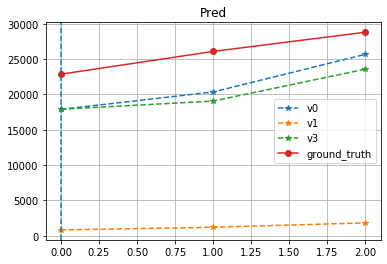

({'v0': array([17880.15332031, 20340.29001617, 25666.42227173]),
  'v1': array([ 817.57034269, 1194.88760614, 1812.22599837]),
  'v3': array([17896.95885468, 19046.58638   , 23569.67610168])},
 array([22859., 26079., 28793.]))

In [5]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'ori-stnn_05-10-17-40-20_1897'
# exp_dir = {'test': exp_name}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
print(exp.config['min_sum_epoch'])
print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(jar_min_sum, path, train=False, increase=False)

In [8]:
exp.draw_loss()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3\\ori-stnn_05-10-17-40-20_1897\\logs.json'

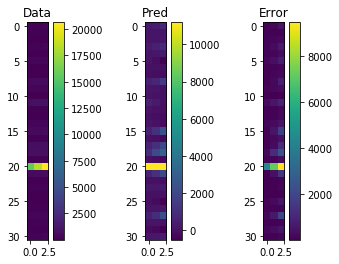

In [9]:
exp.plot_distribution()

## Feb

In [19]:
datadir = 'data'
dataset = 'feb'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()
feb_min_rmse = {'v0': 'ori-stnn_05-10-17-38-30_5447', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
feb_min_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_3'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = 20
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df



,sum_loss,minsum,minrmse,nhid,nlayers,nz,lambd,min_rmse_epoch
ori-stnn_05-10-17-38-30_5447,742.393,160.214,30.5417,100,2,10,0.1,1807
ori-stnn_05-10-17-38-30_5058,3649.19,472.504,70.0058,100,4,10,10,2300
ori-stnn_05-10-17-38-29_3044,9341.17,355.751,71.1426,100,2,10,10,2182
v3-stnn_05-10-17-38-33_0251,11383.6,250.282,72.3394,100,2,10,0.1,1474
ori-stnn_05-10-17-38-30_9768,4026.65,767.619,80.8259,100,4,10,0.1,2562
...,...,...,...,...,...,...,...,...
ori-stnn_05-10-15-44-41_6135,8031.54,19465.5,2168.79,100,4,10,10,2
v3-stnn_05-10-15-44-51_0820,7571.04,14655.6,2325.09,10,4,10,10,38
ori-stnn_05-10-15-44-41_1827,4184.09,21955.1,2361.47,10,2,10,10,2575
ori-stnn_05-10-15-44-41_3910,9236.79,20471.8,2386.8,10,4,10,10,5


In [31]:
result.output_scr_by_dir(jar_min_rmse, jar_folder, minepoch='rmse')
result.output_scr_by_dir(jar_min_sum, jar_folder, minepoch='sum', write='a')
result.output_scr_by_dir(feb_min_rmse, feb_folder, minepoch='rmse', write='a')
result.output_scr_by_dir(feb_min_sum, feb_folder, minepoch='sum', write='a')

9995
281.5994371670056
281.5994371670056


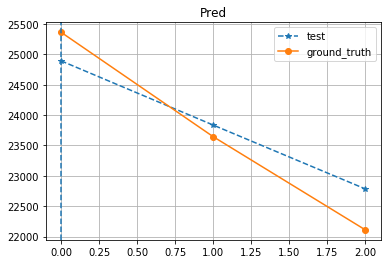

({'test': array([24893.02453613, 23835.34179688, 22783.72558594])},
 array([25364., 23644., 22109.]))

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output_result/feb'
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)

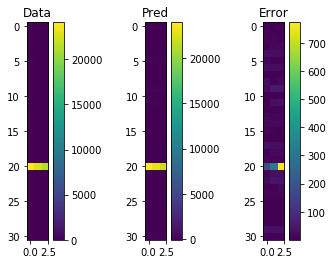

In [21]:
exp.plot_distribution()

## Mar

In [7]:
mar_rnn = {'keras1': 'keras-rnn_05-09-16-50-18_9254', 'keras2': 'keras-rnn_05-09-16-50-18_6213'}
feb_rnn = {'keras1': 'keras-rnn_05-10-15-45-12_0911', 'keras2': 'keras-rnn_05-10-15-45-12_4449'}
jar_rnn = {'keras1': 'keras-rnn_05-09-16-47-47_5547', 'keras2': 'keras-rnn_05-09-16-47-47_1851'}

result.output_scr_by_dir(mar_rnn, rnn_mar_folder, configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(feb_rnn, rnn_feb_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(jar_rnn, rnn_jar_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')



In [6]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))


In [ ]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
minsum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'data_normalize', 'time_datas', 'activation'], increase=False).sort_values('minsum')
mar_df

In [3]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
minsum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'data_normalize', 'time_datas', 'activation'], increase=False).sort_values('minsum')
mar_df

,sum_loss,minsum,minrmse,data_normalize,time_datas,activation
ori-stnn_05-11-00-17-30_7377,9478.48,0.0144942,53.8067,d,[confirmed],sigmoid
v3-stnn_05-11-00-17-30_0015,9347.38,0.0148707,53.8148,d,[confirmed],relu
ori-stnn_05-11-00-17-30_0807,9096.45,0.0696316,53.8102,d,[confirmed],sigmoid
v3-stnn_05-11-00-17-30_5398,9404.47,0.10332,53.7564,d,[confirmed],sigmoid
ori-stnn_05-11-00-17-30_1689,9363.89,0.161182,53.807,d,[confirmed],relu
ori-stnn_05-11-00-17-30_3063,9421.35,0.215872,53.808,d,[confirmed],relu
ori-stnn_05-11-00-17-30_1555,9240.33,0.233491,53.8074,d,[confirmed],sigmoid
v3-stnn_05-11-00-17-30_2593,9273.56,0.256486,52.7724,d,[confirmed],sigmoid
v3-stnn_05-11-00-17-30_2190,9470,0.274086,53.8066,d,[confirmed],relu
v3-stnn_05-11-00-17-30_6996,9358.67,0.318737,53.7798,d,[confirmed],relu


In [23]:
mar_min_rmse = {'v3': 'v3-stnn_05-11-00-11-02_5512', 'v0': 'ori-stnn_05-11-00-10-31_1950', 'v1': 'v1-stnn_05-11-00-17-30_9133'}
mar_min_sum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}


In [24]:
result.output_scr_by_dir(mar_min_rmse, mar_folder)
result.output_scr_by_dir(mar_min_sum, mar_folder, write='a')

In [20]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_mar_result = result.Printer(rnn_mar_folder)
pd.options.display.max_rows = None

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_mar_df = rnn_mar_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation'], increase=False).sort_values('minrmse')
rnn_mar_df

,sum_loss,true_rmse_loss,minrmse,activation
keras-rnn_05-09-16-50-18_9254,27583.7,468.377,6.18729e-06,tanh
keras-rnn_05-09-16-50-18_2281,27709.3,151.342,6.28926e-06,tanh
keras-rnn_05-09-16-50-18_0351,27294.1,1232.93,7.23045e-06,tanh
keras-rnn_05-09-16-50-19_6063,22195.2,15380.2,9.35442e-06,tanh
keras-rnn_05-09-16-50-19_8323,27180,1534.53,1.21223e-05,tanh
keras-rnn_05-09-16-50-19_5562,27525.1,638.806,1.89484e-05,tanh
keras-rnn_05-09-16-50-18_6213,24800.1,7901.23,0.0503347,tanh
keras-rnn_05-09-16-50-19_0833,24667.3,8258.43,0.0503347,tanh
keras-rnn_05-09-16-50-19_3270,24074.1,9869.55,0.0503347,tanh
keras-rnn_05-09-16-50-19_2623,16725.5,31758.7,0.0503347,tanh
